In [ ]:
%pip install yfinance

In [4]:
import yfinance as yf
import numpy as np
import tensorflow as tf
import math

In [5]:
data = yf.download("GC=F", start="2001-01-01", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-09,1867.000000,1880.000000,1867.000000,1872.699951,1872.699951,62
2023-01-10,1877.800049,1878.099976,1871.599976,1871.599976,1871.599976,101
2023-01-11,1873.099976,1877.800049,1873.099976,1874.599976,1874.599976,1236
2023-01-12,1877.199951,1897.400024,1877.199951,1895.500000,1895.500000,59
2023-01-13,1899.000000,1920.900024,1898.300049,1918.400024,1918.400024,59


In [7]:
data.size

33180

In [8]:
# // Predicting the data using the open price 
inp_data = data.Open
price = data.Close

# // Training data - 80%  // Testing data - 20%
X_train = inp_data[:math.floor(inp_data.size * 0.8)]
X_test = inp_data[math.floor(inp_data.size * 0.8):]

y_train = price[:math.floor(price.size * 0.8)]
y_test = price[math.floor(price.size * 0.8):]

In [9]:
# No data is loss
X_train.size + X_test.size == data.Open.size

True

# Model 1

In [10]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(X_train, y_train, epochs=10)

Epoch 1/10
139/139 [==============================] - 1s 2ms/step - loss: 4456.0151 - mae: 4456.0151
Epoch 2/10
139/139 [==============================] - 0s 2ms/step - loss: 4482.7065 - mae: 4482.7065
Epoch 3/10
139/139 [==============================] - 0s 1ms/step - loss: 4477.9536 - mae: 4477.9536
Epoch 4/10
139/139 [==============================] - 0s 2ms/step - loss: 4475.0127 - mae: 4475.0127
Epoch 5/10
139/139 [==============================] - 0s 2ms/step - loss: 4483.5225 - mae: 4483.5225
Epoch 6/10
139/139 [==============================] - 0s 2ms/step - loss: 4473.3770 - mae: 4473.3770
Epoch 7/10
139/139 [==============================] - 0s 2ms/step - loss: 4468.5742 - mae: 4468.5742
Epoch 8/10
139/139 [==============================] - 0s 2ms/step - loss: 4482.9604 - mae: 4482.9604
Epoch 9/10
139/139 [==============================] - 0s 2ms/step - loss: 4461.6553 - mae: 4461.6553
Epoch 10/10
139/139 [==============================] - 0s 2ms/step - loss: 4454.8413 - mae:

In [11]:
model_1.evaluate(X_test, y_test)

35/35 [==============================] - 0s 2ms/step - loss: 3998.2771 - mae: 3998.2771


[3998.277099609375, 3998.277099609375]

# Model 2

In [14]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model_2.fit(X_train, y_train, epochs=10)

Epoch 1/10
139/139 [==============================] - 1s 2ms/step - loss: 683.6716 - mae: 683.6716
Epoch 2/10
139/139 [==============================] - 0s 2ms/step - loss: 92.9412 - mae: 92.9412
Epoch 3/10
139/139 [==============================] - 0s 2ms/step - loss: 5.8930 - mae: 5.8930
Epoch 4/10
139/139 [==============================] - 0s 2ms/step - loss: 5.8866 - mae: 5.8866
Epoch 5/10
139/139 [==============================] - 0s 2ms/step - loss: 5.9625 - mae: 5.9625
Epoch 6/10
139/139 [==============================] - 0s 2ms/step - loss: 5.9958 - mae: 5.9958
Epoch 7/10
139/139 [==============================] - 0s 2ms/step - loss: 5.8864 - mae: 5.8864
Epoch 8/10
139/139 [==============================] - 0s 2ms/step - loss: 5.8641 - mae: 5.8641
Epoch 9/10
139/139 [==============================] - 0s 2ms/step - loss: 5.8997 - mae: 5.8997
Epoch 10/10
139/139 [==============================] - 0s 2ms/step - loss: 5.9834 - mae: 5.9834


In [15]:
model_2.evaluate(X_test, y_test)

35/35 [==============================] - 0s 1ms/step - loss: 12.2917 - mae: 12.2917


[12.291681289672852, 12.291681289672852]

# Model 3

In [37]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
139/139 [==============================] - 1s 3ms/step - loss: 87.1684 - mae: 87.1684
Epoch 2/100
139/139 [==============================] - 0s 3ms/step - loss: 6.6846 - mae: 6.6846
Epoch 3/100
139/139 [==============================] - 0s 3ms/step - loss: 6.6160 - mae: 6.6160
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 6.5188 - mae: 6.5188
Epoch 5/100
139/139 [==============================] - 0s 3ms/step - loss: 7.0861 - mae: 7.0861
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 6.8213 - mae: 6.8213
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 7.0555 - mae: 7.0555
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 6.5889 - mae: 6.5889
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 6.4978 - mae: 6.4978
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 6.6928 - mae: 6.6928
Epoch 11/100
139/139 [===============

In [38]:
model_3.evaluate(X_test, y_test)

35/35 [==============================] - 0s 2ms/step - loss: 10.0020 - mae: 10.0020


[10.002031326293945, 10.002031326293945]

In [39]:
model_3.predict([1868])

1/1 [==============================] - 0s 117ms/step


array([[1869.6005]], dtype=float32)

# Model 4

In [44]:
X_train = tf.expand_dims(tf.constant(X_train), axis=-1)
y_train = tf.constant(y_train)

In [58]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(10, activation=None),
    tf.keras.layers.Dense(1, activation=None)
])

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

model_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
139/139 [==============================] - 1s 2ms/step - loss: 769.2587 - mae: 769.2587
Epoch 2/100
139/139 [==============================] - 0s 3ms/step - loss: 50.6231 - mae: 50.6231
Epoch 3/100
139/139 [==============================] - 0s 3ms/step - loss: 5.9047 - mae: 5.9047
Epoch 4/100
139/139 [==============================] - 0s 3ms/step - loss: 5.8705 - mae: 5.8705
Epoch 5/100
139/139 [==============================] - 0s 3ms/step - loss: 6.0357 - mae: 6.0357
Epoch 6/100
139/139 [==============================] - 0s 3ms/step - loss: 5.9501 - mae: 5.9501
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 6.0311 - mae: 6.0311
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 5.9882 - mae: 5.9882
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 6.0080 - mae: 6.0080
Epoch 10/100
139/139 [==============================] - 0s 3ms/step - loss: 5.9509 - mae: 5.9509
Epoch 11/100
139/139 [===========

In [59]:
model_4.evaluate(X_test, y_test)

35/35 [==============================] - 0s 1ms/step - loss: 10.3860 - mae: 10.3860


[10.386021614074707, 10.386021614074707]

In [90]:
model_4.predict(X_test[-10:])

1/1 [==============================] - 0s 23ms/step


array([[1820.5994],
       [1839.8363],
       [1849.2545],
       [1858.8732],
       [1842.0405],
       [1870.6962],
       [1881.5168],
       [1876.8077],
       [1880.9155],
       [1902.7577]], dtype=float32)

In [57]:
y_test[-10:]

Date
2022-12-30    1819.699951
2023-01-03    1839.699951
2023-01-04    1852.800049
2023-01-05    1834.800049
2023-01-06    1864.199951
2023-01-09    1872.699951
2023-01-10    1871.599976
2023-01-11    1874.599976
2023-01-12    1895.500000
2023-01-13    1918.400024
Name: Close, dtype: float64

In [ ]:
%pip install matplotlib

In [85]:
import matplotlib.pyplot as plt

def plot_predictions(predictions,
                     train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


35/35 [==============================] - 0s 2ms/step


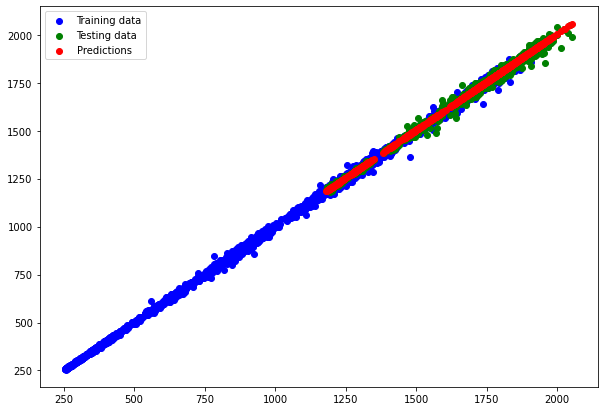

In [88]:
prediction = model_4.predict(X_test)
plot_predictions(predictions=prediction)